In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dtype, int64, float64
from pandas import DataFrame, Int64Dtype
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import MDS
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [46]:
def сonvert_data(row: [str]) -> [int]:
    row_unique_values = list(set(row))
    mapping = {key: value for value, key in enumerate(row_unique_values)}

    return list(map(lambda item: mapping[item], row))


In [47]:
def optimize_csv(csv: DataFrame):
    for column_alias in csv:
        current_column = csv[column_alias]

        if current_column.dtypes is np.dtype(object):
            csv[column_alias] = normalize(np.array(сonvert_data(current_column))[:, np.newaxis], axis=0).ravel()

        elif current_column.dtypes is np.dtype(int64) or current_column.dtypes is np.dtype(float64):
            csv[column_alias] = normalize(np.array(current_column)[:, np.newaxis], axis=0).ravel()

In [48]:
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [49]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [50]:
data = pd.read_csv('res/housing.data',header=None,sep='\s+',
                   usecols=[0,1,2,4,5,6,7,8,9,10,11,12,13] )
print(data)

data.columns = ['CRIM', 'ZN', 'INDUS','NOX', 'RM',
        'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B',
             'LSTAT', 'MEDV']


          0     1      2      4      5     6       7   8      9     10      11    12    13
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900   1  296.0  15.3  396.90  4.98  24.0
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671   2  242.0  17.8  396.90  9.14  21.6
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671   2  242.0  17.8  392.83  4.03  34.7
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622   3  222.0  18.7  394.63  2.94  33.4
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622   3  222.0  18.7  396.90  5.33  36.2
..       ...   ...    ...    ...    ...   ...     ...  ..    ...   ...     ...   ...   ...
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786   1  273.0  21.0  391.99  9.67  22.4
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875   1  273.0  21.0  396.90  9.08  20.6
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675   1  273.0  21.0  396.90  5.64  23.9
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889   1  273.0  21.0  393.45  6.48  22.0

In [51]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [52]:
optimize_csv(data)
print(data)

         CRIM        ZN     INDUS       NOX        RM       AGE       DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV
0    0.000030  0.030868  0.007853  0.042208  0.046222  0.039107  0.041904  0.003442  0.029798  0.036604  0.047927  0.015241  0.043845
1    0.000130  0.000000  0.024035  0.036795  0.045139  0.047324  0.050890  0.006883  0.024362  0.042585  0.047927  0.027973  0.039461
2    0.000130  0.000000  0.024035  0.036795  0.050510  0.036648  0.050890  0.006883  0.024362  0.042585  0.047436  0.012334  0.063393
3    0.000154  0.000000  0.007411  0.035932  0.049196  0.027471  0.062109  0.010325  0.022349  0.044738  0.047653  0.008998  0.061018
4    0.000329  0.000000  0.007411  0.035932  0.050243  0.032509  0.062109  0.010325  0.022349  0.044738  0.047927  0.016312  0.066133
..        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
501  0.000299  0.000000  0.040557  0.044954  0.046349  0.04144

In [53]:
data

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000030,0.030868,0.007853,0.042208,0.046222,0.039107,0.041904,0.003442,0.029798,0.036604,0.047927,0.015241,0.043845
1,0.000130,0.000000,0.024035,0.036795,0.045139,0.047324,0.050890,0.006883,0.024362,0.042585,0.047927,0.027973,0.039461
2,0.000130,0.000000,0.024035,0.036795,0.050510,0.036648,0.050890,0.006883,0.024362,0.042585,0.047436,0.012334,0.063393
3,0.000154,0.000000,0.007411,0.035932,0.049196,0.027471,0.062109,0.010325,0.022349,0.044738,0.047653,0.008998,0.061018
4,0.000329,0.000000,0.007411,0.035932,0.050243,0.032509,0.062109,0.010325,0.022349,0.044738,0.047927,0.016312,0.066133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000299,0.000000,0.040557,0.044954,0.046349,0.041446,0.025394,0.003442,0.027483,0.050241,0.047334,0.029595,0.040922
502,0.000216,0.000000,0.040557,0.044954,0.043023,0.046005,0.023436,0.003442,0.027483,0.050241,0.047927,0.027789,0.037634
503,0.000290,0.000000,0.040557,0.044954,0.049041,0.054582,0.022207,0.003442,0.027483,0.050241,0.047927,0.017261,0.043662
504,0.000523,0.000000,0.040557,0.044954,0.047762,0.053562,0.024475,0.003442,0.027483,0.050241,0.047510,0.019832,0.040191


In [54]:
k_means = KMeans()
k_means.fit(data)
k_means.inertia_

label = k_means.fit_predict(data)

u_labels = np.unique(label)


 


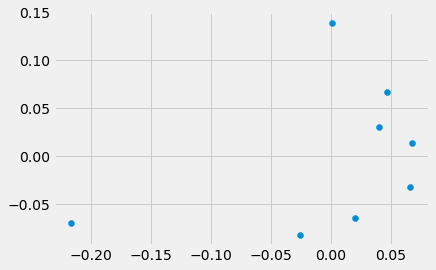

In [55]:
embedding = MDS(n_components=2)
x = embedding.fit_transform(k_means.cluster_centers_)
plt.scatter(x[:, 0], x[:, 1])

In [56]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

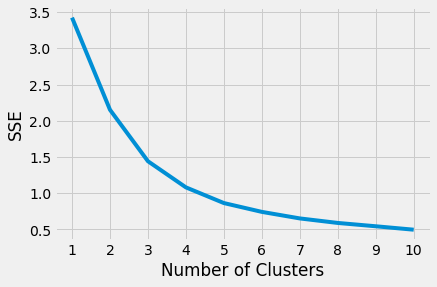

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [58]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Using auto-detecation for elbow method below, kl is =", kl.elbow)

Using auto-detecation for elbow method below, kl is = 4


In [59]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

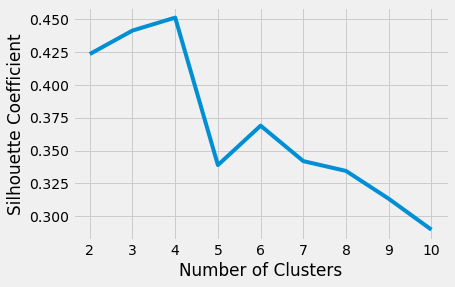

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [61]:
k_means = KMeans(n_clusters=4, random_state=0) # clear inner k nearest neighbors clustering (k=4)
k_means.fit(data)
k_means.inertia_

1.080584266419543

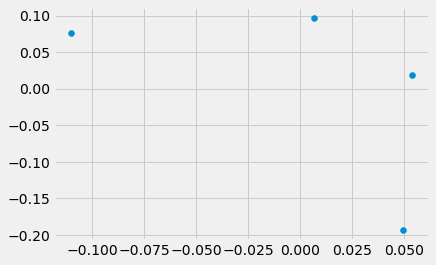

In [62]:
embedding = MDS(n_components=2)
x = embedding.fit_transform(k_means.cluster_centers_)
plt.scatter(x[:, 0], x[:, 1])

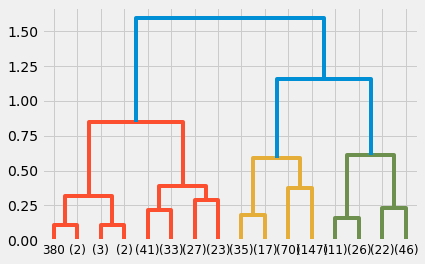

In [63]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)
plot_dendrogram(model, truncate_mode='level', p=3)
